### Урок 4. Сверточные нейронные сети

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dense, Flatten, Dropout, Activation
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [5]:
x_input = Input(shape=(8, 8, 1))
x_conv = Conv2D(1, (3, 3), activation='relu', padding='same')(x_input)
x_pool = MaxPooling2D(pool_size=(2, 2), strides=None, padding='same')(x_conv)
model = Model(x_input, x_pool)

In [6]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 8, 8, 1)]         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 1)           10        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 1)           0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.layers[-2].get_weights()

[array([[[[ 0.08486432]],
 
         [[-0.21915406]],
 
         [[-0.48361212]]],
 
 
        [[[ 0.42530322]],
 
         [[ 0.12069231]],
 
         [[-0.30381247]]],
 
 
        [[[-0.5209261 ]],
 
         [[-0.11215392]],
 
         [[-0.09061003]]]], dtype=float32),
 array([0.], dtype=float32)]

In [8]:
# Не очень кстати понятно - откуда веса взялись? Случайные начальные значения просто?

In [9]:
from tensorflow.keras.datasets import cifar10

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 190s 1us/step


In [12]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [18]:
x_train.shape[1:]

(32, 32, 3)

In [82]:
# Базовая сеть с вебинара

x_input = Input(shape=(32, 32, 3))
x_conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_input)
x_conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_conv1)
x_pool1 = MaxPooling2D(pool_size=(2, 2), strides=None)(x_conv2)
x_drop1 = Dropout(0.25)(x_pool1)

x_conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(x_drop1)
x_conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x_conv3)
x_pool2 = MaxPooling2D(pool_size=(2, 2), strides=None)(x_conv4)
x_drop2 = Dropout(0.25)(x_pool2)

x_flatten = Flatten()(x_drop2)
x_dense1 = Dense(512, activation='relu')(x_flatten)
x_drop3 = Dropout(0.25)(x_dense1)
x_result = Dense(10, activation='softmax')(x_drop3)

model = Model(x_input, x_result)

In [21]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)       

In [22]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0,
    zoom_range=0,
    channel_shift_range=0,
    fill_mode='nearest',
    cval=0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0
)

In [23]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [83]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [84]:
hh = model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=10, validation_data=(x_test, to_categorical(y_test)))

Epoch 1/10
1563/1563 [==============================] - 168s 107ms/step - loss: 1.5182 - accuracy: 0.4464 - val_loss: 1.1002 - val_accuracy: 0.6058
Epoch 2/10
1563/1563 [==============================] - 160s 102ms/step - loss: 1.1745 - accuracy: 0.5787 - val_loss: 0.9935 - val_accuracy: 0.6425
Epoch 3/10
1563/1563 [==============================] - 161s 103ms/step - loss: 1.0459 - accuracy: 0.6284 - val_loss: 0.9103 - val_accuracy: 0.6770
Epoch 4/10
1563/1563 [==============================] - 164s 105ms/step - loss: 0.9769 - accuracy: 0.6534 - val_loss: 0.8992 - val_accuracy: 0.6901
Epoch 5/10
1563/1563 [==============================] - 170s 109ms/step - loss: 0.9137 - accuracy: 0.6768 - val_loss: 0.7882 - val_accuracy: 0.7171
Epoch 6/10
1563/1563 [==============================] - 166s 106ms/step - loss: 0.8708 - accuracy: 0.6942 - val_loss: 0.8038 - val_accuracy: 0.7181
Epoch 7/10
1563/1563 [==============================] - 165s 105ms/step - loss: 0.8390 - accuracy: 0.7039 - val_

In [51]:
import matplotlib.pyplot as plt

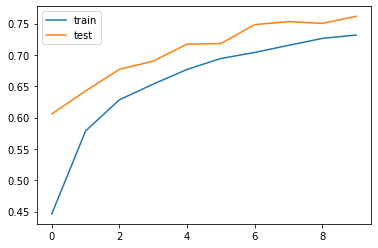

In [85]:
plt.plot(range(10), hh.history['accuracy'])
plt.plot(range(10), hh.history['val_accuracy'])
plt.legend(('train', 'test'))

In [126]:
# Удивительно, но валидационный скор лучше трейнового и похоже после 10 эпох все еще растет
# Но - как-же это долго...

cat - cat


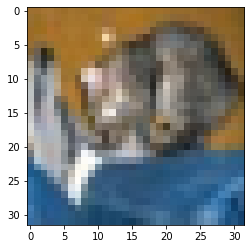

In [125]:
N = 0
y_p = model.predict(x_test[N:N+1][:, :, :])
y_t = np.argmax(to_categorical(y_test)[N:N+1], axis=1)
y_i = np.argmax(y_p, axis=1)
plt.imshow(x_test[N])
print('{} - {}'.format(classes[y_t[0]], classes[y_i[0]]))

In [134]:
# Попробуем усложнить сеть
# Кажется что для конфигурации без ветвлений удобнее пользоваться не функциональной моделью описания сетей
# Некое подобие AlexNet (мне так кажется)

model = Sequential()

model.add(Conv2D(64, (5, 5), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1))
model.add(Dropout(0.2))

model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [135]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 13, 13, 128)      

In [136]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [137]:
hh2 = model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, validation_data=(x_test, to_categorical(y_test)))

1563/1563 [==============================] - 172s 110ms/step - loss: 1.7374 - accuracy: 0.3578 - val_loss: 1.4093 - val_accuracy: 0.4889


In [151]:
# Старт гораздо менее впечатляющий )
# Перестроим

model = Sequential()

model.add(Conv2D(64, (5, 5), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(128, (4, 4), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [152]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 32, 32, 64)        4864      
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 32, 32, 128)       131200    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 8, 8, 64)          73792     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 7, 7, 64)         

In [153]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [154]:
hh2 = model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, validation_data=(x_test, to_categorical(y_test)))

1563/1563 [==============================] - 474s 303ms/step - loss: 1.8904 - accuracy: 0.2657 - val_loss: 1.6781 - val_accuracy: 0.3763


In [165]:
# Еще хуже
# Движемся в сторону той которая была на вебинаре

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
#model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [166]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 8, 8, 64)        

In [167]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [168]:
hh2 = model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, validation_data=(x_test, to_categorical(y_test)))

1563/1563 [==============================] - 470s 301ms/step - loss: 1.6687 - accuracy: 0.3815 - val_loss: 1.2693 - val_accuracy: 0.5343


In [169]:
# Продолжаем

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 8, 8, 64)        

In [171]:
# Продолжаем

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 8, 8, 64)        

In [172]:
# Пробуем дальше

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 8, 8, 64)        

In [174]:
# Пробуем дальше

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 16, 16, 32)      

In [175]:
# Пробуем дальше

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_119 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 8, 8, 32)        

In [176]:
# Пробуем дальше

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_123 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_71 (Dropout)         (None, 8, 8, 32)        

In [177]:
# Пробуем дальше

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_126 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 8, 8, 32)        

In [178]:
# Пробуем дальше

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_130 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_76 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 16, 16, 32)        18464     
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 8, 8, 32)        

In [179]:
# Пробуем дальше

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_134 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_79 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 8, 8, 32)        

In [180]:
# Пробуем дальше

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_138 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_82 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 16, 16, 16)        2320      
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 8, 8, 16)        

In [182]:
# Пробуем дальше

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_148 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_87 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 16, 16, 16)        2320      
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 16, 16, 16)      

In [184]:
# Пробуем дальше

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_160 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_161 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_94 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_162 (Conv2D)          (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_95 (Dropout)         (None, 8, 8, 16)        

In [185]:
# Пробуем дальше

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_163 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_97 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 8, 8, 16)        

In [189]:
# Пробуем дальше

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_178 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_179 (Conv2D)          (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_109 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_110 (Dropout)        (None, 8, 8, 16)        

In [190]:
# Пробуем дальше

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_181 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_112 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_184 (Conv2D)          (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 8, 8, 16)        

In [197]:
# Пробуем дальше

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=1))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_211 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_212 (Conv2D)          (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_133 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_213 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_214 (Conv2D)          (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 8, 8, 16)        

In [204]:
# Что-то интересное

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=1))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_240 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_241 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_112 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_154 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_242 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_243 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_113 (MaxPoolin (None, 8, 8, 32)        

In [211]:
# Что-то интересное

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
# model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
model.add(Conv2D(32, (3, 3), padding='same'))
# # model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=1))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_271 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_272 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_124 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_174 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_273 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_125 (MaxPoolin (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_175 (Dropout)        (None, 8, 8, 32)        

In [216]:
model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
# model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
# model.add(Conv2D(32, (3, 3), padding='same'))
# # model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))


# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=1))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_282 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_283 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_134 (MaxPoolin (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_189 (Dropout)        (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_60 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_163 (Dense)            (None, 1024)              3277824   
_________________________________________________________________
dropout_190 (Dropout)        (None, 1024)            

In [218]:
model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
# model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
model.add(Conv2D(32, (3, 3), padding='same'))
# # model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1))
model.add(Dropout(0.25))


# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=1))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_287 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_288 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_137 (MaxPoolin (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_194 (Dropout)        (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_289 (Conv2D)          (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_138 (MaxPoolin (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_195 (Dropout)        (None, 9, 9, 32)        

In [224]:
model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
# model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
model.add(Conv2D(16, (3, 3), padding='same'))
# # model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1))
model.add(Dropout(0.3))


# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=1))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_305 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_306 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_149 (MaxPoolin (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_212 (Dropout)        (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_307 (Conv2D)          (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_150 (MaxPoolin (None, 9, 9, 16)          0         
_________________________________________________________________
dropout_213 (Dropout)        (None, 9, 9, 16)        

In [230]:
model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
# model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
model.add(Conv2D(32, (3, 3), padding='same'))
# # model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=1))
model.add(Dropout(0.3))


# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=1))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_325 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_326 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_161 (MaxPoolin (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_230 (Dropout)        (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_327 (Conv2D)          (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_162 (MaxPoolin (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_231 (Dropout)        (None, 8, 8, 32)        

In [234]:
model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='tanh'))
# model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
model.add(Conv2D(64, (3, 3), padding='same'))
# # model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=1))
model.add(Dropout(0.3))


# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=1))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_337 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_338 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_169 (MaxPoolin (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_242 (Dropout)        (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_339 (Conv2D)          (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_170 (MaxPoolin (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_243 (Dropout)        (None, 8, 8, 64)        

In [238]:
# Вобщем большое количество параметров быстрее ведет к переобучению

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
# model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
model.add(Conv2D(32, (5, 5), padding='same'))
# # model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=1))
model.add(Dropout(0.3))


# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=1))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_349 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_350 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_177 (MaxPoolin (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_254 (Dropout)        (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_351 (Conv2D)          (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_178 (MaxPoolin (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_255 (Dropout)        (None, 8, 8, 32)        

In [240]:
# Попробую еще полносвязные слои поварьировать

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
# model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
model.add(Conv2D(32, (5, 5), padding='same'))
# # model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=1))
model.add(Dropout(0.3))


# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=1))

model.add(Flatten())

model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_355 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_356 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_181 (MaxPoolin (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_260 (Dropout)        (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_357 (Conv2D)          (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_182 (MaxPoolin (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_261 (Dropout)        (None, 8, 8, 32)        

In [245]:
model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
# model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
model.add(Conv2D(32, (5, 5), padding='same'))
# # model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=1))
model.add(Dropout(0.3))


# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=1))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_370 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_371 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_191 (MaxPoolin (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_275 (Dropout)        (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_372 (Conv2D)          (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_192 (MaxPoolin (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_276 (Dropout)        (None, 8, 8, 32)        

In [260]:
# Немного отвлеченных экспериментов
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, AveragePooling2D, Conv1D

model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
# model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='tanh'))
model.add(Conv2D(32, (5, 5), padding='same'))
# # model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=1))
# model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
# model.add(AveragePooling2D(pool_size=(2, 2)))

# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=1))

# model.add(Conv1D(64, (3, ), activation='relu'))

model.add(Flatten())



model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_415 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_416 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_219 (MaxPoolin (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_316 (Dropout)        (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_417 (Conv2D)          (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_220 (MaxPoolin (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_317 (Dropout)        (None, 8, 8, 32)       

In [262]:
from tensorflow.keras.layers import Concatenate
# Попробуем разветвленный вариант

x_input = Input(shape=(32, 32, 3))

# Первая ветка
x_conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_input)
x_conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_conv1)
x_pool1 = MaxPooling2D(pool_size=(2, 2), strides=None)(x_conv2)
x_drop1 = Dropout(0.25)(x_pool1)

x_conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(x_drop1)
x_conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x_conv3)
x_pool2 = MaxPooling2D(pool_size=(2, 2), strides=None)(x_conv4)
x_drop2 = Dropout(0.25)(x_pool2)

x_flatten = Flatten()(x_drop2)

# Вторая ветка
xx_conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_input)
xx_conv2 = Conv2D(32, (3, 3), activation='tanh', padding='same')(xx_conv1)
xx_pool1 = MaxPooling2D(pool_size=(2, 2), strides=None)(xx_conv2)
xx_drop1 = Dropout(0.25)(xx_pool1)

xx_conv3 = Conv2D(32, (5, 5), padding='same')(xx_drop1)
xx_pool2 = MaxPooling2D(pool_size=(3, 3), strides=1)(xx_conv3)
xx_drop2 = Dropout(0.3)(xx_pool2)

xx_flatten = Flatten()(xx_drop2)

# Третья ветка
xxx_conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_input)
xxx_pool1 = AveragePooling2D(pool_size=(2, 2), strides=None)(xxx_conv1)
xxx_drop1 = Dropout(0.25)(xxx_pool1)

xxx_conv3 = Conv2D(32, (5, 5), padding='same')(xxx_drop1)
xxx_pool2 = AveragePooling2D(pool_size=(3, 3), strides=1)(xxx_conv3)
xxx_drop2 = Dropout(0.3)(xxx_pool2)

xxx_flatten = Flatten()(xxx_drop2)

# Сборка

merge = Concatenate()([x_flatten, xx_flatten, xxx_flatten])

dense1 = Dense(512, activation='relu')(merge)
drop3 = Dropout(0.5)(dense1)
dense2 = Dense(256, activation='relu')(drop3)
dense3 = Dense(128, activation='tanh')(dense2)
result = Dense(10, activation='softmax')(dense3)

model = Model(x_input, result)

In [263]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_103 (InputLayer)          [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_427 (Conv2D)             (None, 32, 32, 32)   896         input_103[0][0]                  
__________________________________________________________________________________________________
conv2d_428 (Conv2D)             (None, 32, 32, 32)   9248        conv2d_427[0][0]                 
__________________________________________________________________________________________________
conv2d_431 (Conv2D)             (None, 32, 32, 32)   896         input_103[0][0]                  
_______________________________________________________________________________________

In [264]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [265]:
model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=1, 
                    validation_data=(x_test, to_categorical(y_test)))

1563/1563 [==============================] - 355s 227ms/step - loss: 1.4789 - accuracy: 0.4725 - val_loss: 1.0622 - val_accuracy: 0.6307


In [273]:
from tensorflow.keras.optimizers import Adam

x_input = Input(shape=(32, 32, 3))

# Первая ветка
x_conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_input)
x_conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_conv1)
x_pool1 = MaxPooling2D(pool_size=(2, 2), strides=None)(x_conv2)
x_drop1 = Dropout(0.25)(x_pool1)

x_conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(x_drop1)
x_conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x_conv3)
x_pool2 = MaxPooling2D(pool_size=(2, 2), strides=None)(x_conv4)
x_drop2 = Dropout(0.25)(x_pool2)

x_flatten = Flatten()(x_drop2)

# Вторая ветка
xx_conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_input)
xx_conv2 = Conv2D(32, (3, 3), activation='tanh', padding='same')(xx_conv1)
xx_pool1 = MaxPooling2D(pool_size=(2, 2), strides=None)(xx_conv2)
xx_drop1 = Dropout(0.25)(xx_pool1)

xx_conv3 = Conv2D(32, (5, 5), padding='same')(xx_drop1)
xx_pool2 = MaxPooling2D(pool_size=(3, 3), strides=1)(xx_conv3)
xx_drop2 = Dropout(0.3)(xx_pool2)

xx_flatten = Flatten()(xx_drop2)

# Третья ветка
xxx_conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_input)
xxx_pool1 = AveragePooling2D(pool_size=(2, 2), strides=None)(xxx_conv1)
xxx_drop1 = Dropout(0.25)(xxx_pool1)

xxx_conv3 = Conv2D(32, (5, 5), padding='same')(xxx_drop1)
xxx_pool2 = AveragePooling2D(pool_size=(3, 3), strides=1)(xxx_conv3)
xxx_drop2 = Dropout(0.3)(xxx_pool2)

xxx_flatten = Flatten()(xxx_drop2)

# Сборка

merge = Concatenate()([x_flatten, xx_flatten, xxx_flatten])

dense1 = Dense(512, activation='relu')(merge)
drop3 = Dropout(0.5)(dense1)
# dense2 = Dense(256, activation='relu')(drop3)
# dense3 = Dense(128, activation='tanh')(dense2)
result = Dense(10, activation='softmax')(drop3)

model = Model(x_input, result)
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

hh = model.fit_generator(datagen.flow(x_train, to_categorical(y_train), batch_size=32), epochs=20, 
                    validation_data=(x_test, to_categorical(y_test)))

Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_111 (InputLayer)          [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_499 (Conv2D)             (None, 32, 32, 32)   896         input_111[0][0]                  
__________________________________________________________________________________________________
conv2d_500 (Conv2D)             (None, 32, 32, 32)   9248        conv2d_499[0][0]                 
__________________________________________________________________________________________________
conv2d_503 (Conv2D)             (None, 32, 32, 32)   896         input_111[0][0]                  
______________________________________________________________________________________

1563/1563 [==============================] - 336s 215ms/step - loss: 0.9160 - accuracy: 0.6868 - val_loss: 0.7828 - val_accuracy: 0.7441
Epoch 13/20
1563/1563 [==============================] - 335s 214ms/step - loss: 0.9081 - accuracy: 0.6890 - val_loss: 0.7153 - val_accuracy: 0.7552
Epoch 14/20
1563/1563 [==============================] - 336s 215ms/step - loss: 0.8920 - accuracy: 0.6959 - val_loss: 0.8297 - val_accuracy: 0.7272
Epoch 15/20
1563/1563 [==============================] - 336s 215ms/step - loss: 0.8974 - accuracy: 0.6940 - val_loss: 0.7879 - val_accuracy: 0.7513
Epoch 16/20
1563/1563 [==============================] - 336s 215ms/step - loss: 0.8872 - accuracy: 0.6975 - val_loss: 0.7034 - val_accuracy: 0.7687
Epoch 17/20
1563/1563 [==============================] - 339s 217ms/step - loss: 0.8794 - accuracy: 0.7001 - val_loss: 0.6858 - val_accuracy: 0.7740
Epoch 18/20
1563/1563 [==============================] - 338s 216ms/step - loss: 0.8778 - accuracy: 0.7037 - val_loss:

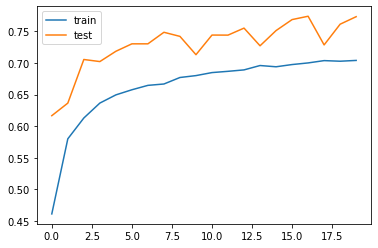

In [274]:
plt.plot(range(20), hh.history['accuracy'])
plt.plot(range(20), hh.history['val_accuracy'])
plt.legend(('train', 'test'))

In [275]:
# Ну вобщем практически такой-же результат, как и у более простой модели (с вебинара).. 
# Может быть совсем чуть-чуть лучше. (времени гонять несколько тестов нет.. не на ноутбуке по крайней мере)
# Сильного переобучения за 20 эпох не наступает, видимо благодаря сильным дропаут слоям. 
# Но трейновая метрика после 6-7 эпох начинает демонстрировать довольно нестабильные результаты

In [276]:
# Извиняюсь за такой "поток сознания" - надо было бы наверное подумать - в какую-нибудь функцию обернуть это...